# Seminar work
# Parallel Programming

____


## Assignment:

Zero crossing algorithm in various implementations.

+ Pure Python
+ Python using numpy
+ Python using numba
+ C language



<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/a/a4/Zero_crossing_2.svg/1200px-Zero_crossing_2.svg.png" alt="Zero Crossing Image" width="350" height="250">

### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Implementation of algorithm

In [2]:
def zero_cross(data):
  prev_positive = data[0] > 0
  num_cross = 0

  for y_val in data[1:]:
    if y_val > 0 and not prev_positive:
      num_cross += 1
      prev_positive = True
    elif y_val < 0 and prev_positive:
      num_cross +=1
      prev_positive = False

  return num_cross

## Data

In [3]:
y = np.loadtxt('Data/ABPsignal.txt', delimiter='\t')[:,1]  # Loading data.
y = (((y - np.min(y)) / (np.max(y)-np.min(y)))*2)-1  # Scaling to (-1,1).

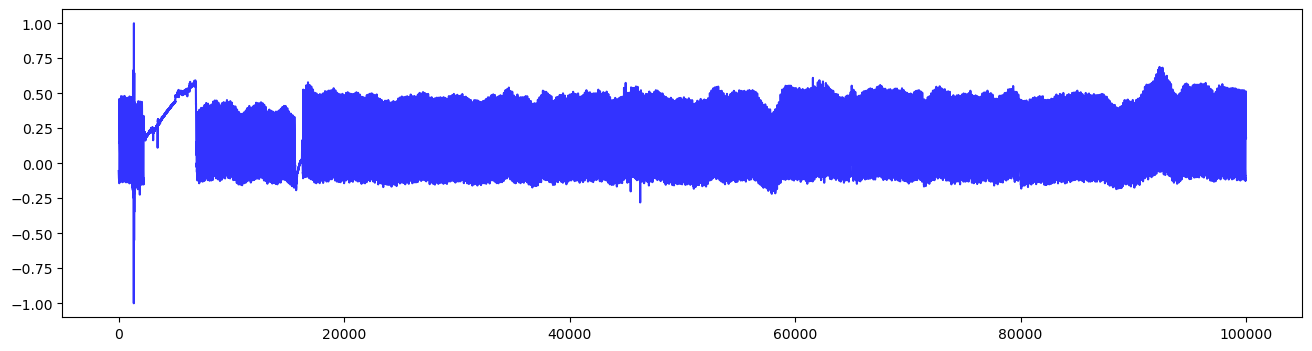

In [4]:
fig = plt.figure(figsize=(16,4))

plt.plot(y, c='blue', alpha=0.8)
plt.show()

## Time elapsing

In [5]:
def convert_to_array(data):
    results = []

    for s in data:        
        s = s.replace('[', '')
        s = s.replace(']', '')
        results = results + s.split()

    return np.array(results).astype(np.float64)

In [6]:
pure_python_times = !mpiexec -n 8 python PAR_pure_python.py
numpy_times = !mpiexec -n 8 python PAR_numpy.py
numpy_2_times = !mpiexec -n 8 python PAR_numpy_2.py
numba_times = !python PAR_numba.py

pure_python_times = convert_to_array(pure_python_times)
numpy_times = convert_to_array(numpy_times)
numpy_2_times = convert_to_array(numpy_2_times)
numba_times = convert_to_array(numba_times)

## Results

In [11]:
C_times = np.loadtxt('Results/results_C_50_attempts.txt',delimiter=',')

In [12]:
print(f'Average time of pure python implementation is:\t\t{np.mean(pure_python_times[1:]):.20f} +- {np.std(pure_python_times[1:]):.20f}.')
print(f'Average time of numpy python implementation is:\t\t{np.mean(numpy_times[1:]):.20f} +- {np.std(numpy_times[1:]):.20f}.')
print(f'Average time of numpy 2 python implementation is:\t{np.mean(numpy_2_times[1:]):.20f} +- {np.std(numpy_2_times[1:]):.20f}.')
print(f'Average time of numba python implementation is:\t\t{np.mean(numba_times[1:]):.20f} +- {np.std(numba_times[1:]):.20f}.')
print(f'Average time of C implementation is:\t\t\t{np.mean(C_times[1:]):.20f} +- {np.std(C_times[1:]):.20f}.')

Average time of pure python implementation is:		0.51546171836734688831 +- 0.15249152065944943102.
Average time of numpy python implementation is:		0.12187831224489795168 +- 0.00617580224485897531.
Average time of numpy 2 python implementation is:	0.06177552244897959594 +- 0.00230031032664808083.
Average time of numba python implementation is:		0.00327648367346938764 +- 0.00025989251887289377.
Average time of C implementation is:			0.03403020408163265342 +- 0.00161991873038265879.


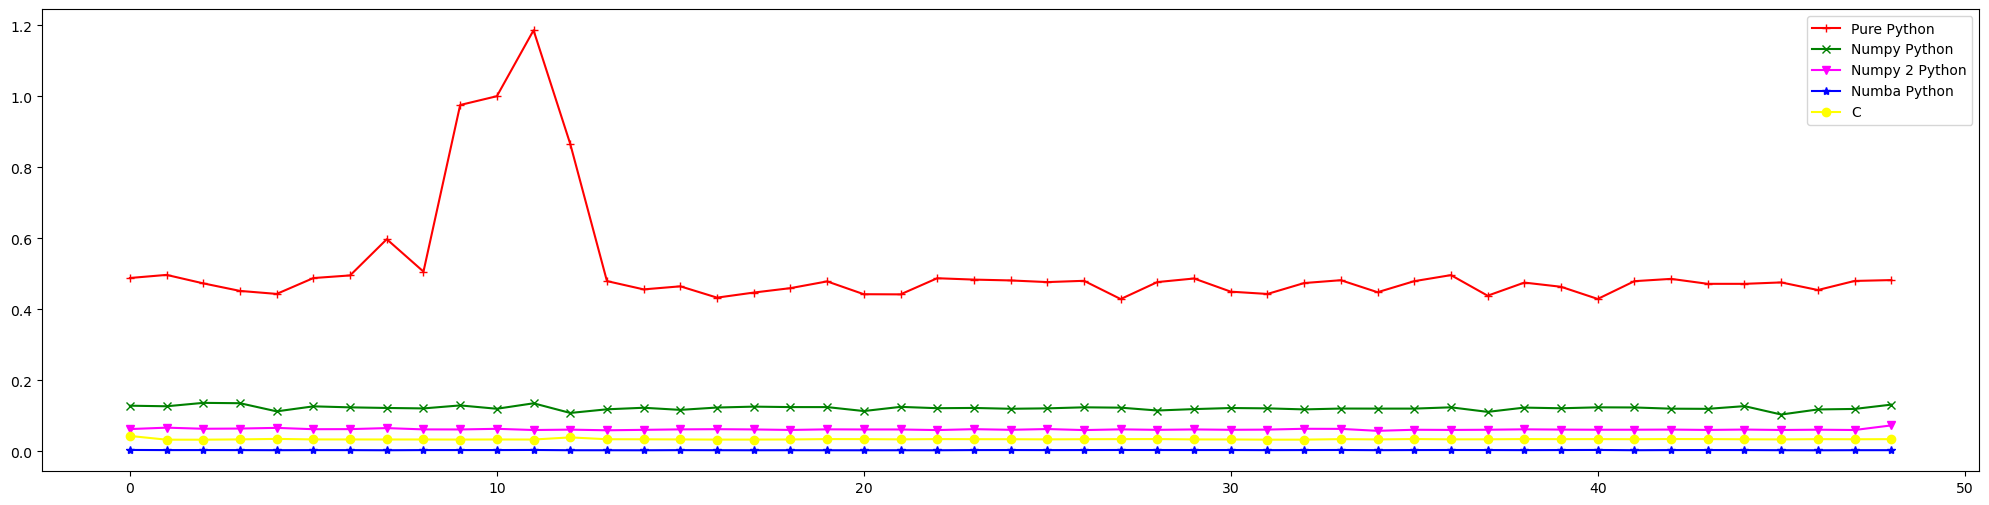

In [13]:
fig = plt.figure(figsize=(25,6))

plt.plot(pure_python_times[1:], marker='+', c='red', label='Pure Python')
plt.plot(numpy_times[1:], marker='x', c='green', label='Numpy Python')
plt.plot(numpy_2_times[1:], marker='v', c='magenta', label='Numpy 2 Python')
plt.plot(numba_times[1:], marker='*', c='blue', label='Numba Python')
plt.plot(C_times[1:], marker='o', c='yellow', label='C')

plt.legend()

plt.show()

### Closer look at faster implementations

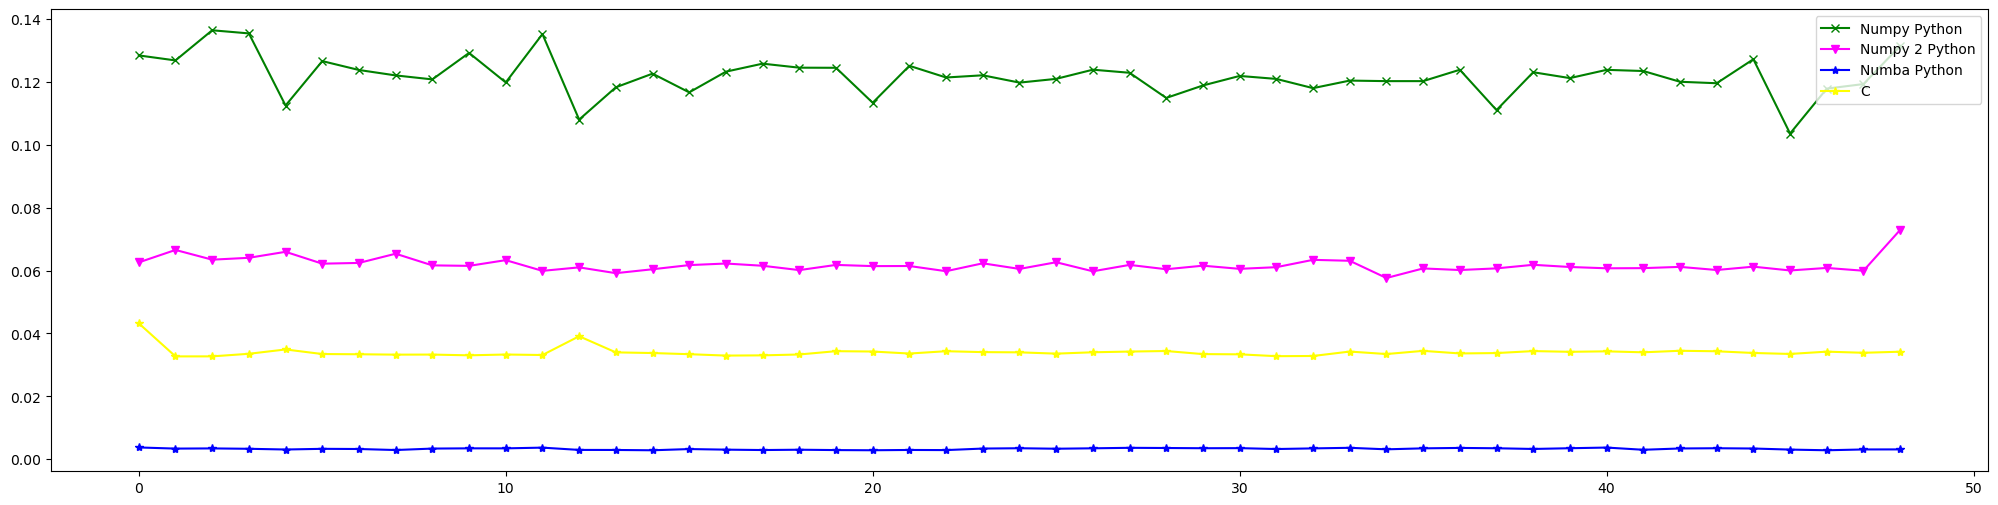

In [14]:
fig = plt.figure(figsize=(25,6))

plt.plot(numpy_times[1:], marker='x', c='green', label='Numpy Python')
plt.plot(numpy_2_times[1:], marker='v', c='magenta', label='Numpy 2 Python')
plt.plot(numba_times[1:], marker='*', c='blue', label='Numba Python')
plt.plot(C_times[1:], marker='*', c='yellow', label='C')

plt.legend()

plt.show()

## Sources

+ https://en.wikipedia.org/wiki/Zero_crossing

+ https://codereview.stackexchange.com/questions/45458/finding-a-zero-crossing-in-a-matrix

+ https://mpi4py.readthedocs.io/en/stable/tutorial.html#collective-communication